# Overview of Machine Learning

Machine Learning (ML) is a subfield of Artificial Intelligence that uses computation to build models from data. Like modeling tasks in other fields, the goal of machine learning is to represent a real-world system in a meaningful way. Generally, ML algorithms take various forms of data and look for underlying relationships that may have gone unnoticed by humans - all without being explicitly programmed to do so!

The algorithms themselves are based on statistics and mathematical optimization techniques. There are different types of algorithms available, and the appropriate ones to apply will largely depend on the data and the problem at hand. Algorithms are usually grouped by the following type:

- **Supervised learning algorithms**: learn patterns from labeled data then apply those patterns to make accurate predictions about new, similar data. You're creating a prediction machine
- **Unsupervised learning algorithms**: give insight into the structure of the data or reduce the number of variables (or features) to those that are relevant. You're creating an association machine
- **Recommender system algorithms**: learn relationships within data to make useful recommendations. You're creating a (surprise!) recommendation machine
- **Reinforcement learning algorithms**: find the optimal way to perform a task or learn how to interact in an environment, given a system of rewards and punishments. You're creating a decision machine

Machine Learning is closely related to predictive statistics, and is sometimes referred to as predictive analytics or predictive modeling.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import sklearn.datasets
from sklearn.model_selection import train_test_split

## Supervised Learning

Supervised learning is in the realm of building models to make predictions. The data that are fed to the machine learning algorithms include the "answer" or outcome the model needs to predict, which is also called the target variable or label. The model uses this to learn the relationships between the independent variables (the input, or features) and the labels, and that mapping is later applied to new, unseen data to make predictions going forward.

Supervised learning is further broken down by the type of problem - there are **classification** problems, which predict a class or category of an observation, and **regression** problems, which predict a numerical value for an observation.

### Classification and its Performance Measures

Examples of classification algorithms:

- **Logistic Regression**: applies sigmoid function to linear regression, can use either $L_1$ or $L_2$ norm
- **$k$-Nearest Neighbors (kNN)**: finds $k$-nearest neighbors based on a similarity function and uses majority vote to determine the class
- **Random forest classifier**:
- **Stochastic Gradient Descent classifier**: capable of handling large datasets and training in batches (or each instance independently)
- [TO COME]

#### Performance Measures

Classification problems use performance measures that tie closely to the **confusion matrix**, which is a grid of actual labels against the model's predicted results. The best performance measure to optimize for a model will depend on the specifics of the problem.

| Actual: | Predicted False | Predicted True |
| ----- | ----- | ----- |
| **Is False** | True Negative (TN) | False Positive (FP) |
| **Is True** | False Negative (FN) | True Positive (TP) |


A **type I error** (false negative) is when the label is true but the observation is incorrectly classified as false. The probability of a type I error is called **alpha risk**. A **type II error** (false positive) is when the label is false but the observation is incorrectly classified as true. The probability of a type II error is called **beta risk**.

- **Accuracy**: the fraction of correct predictions to total predictions $\frac{TN + TP}{TN + FN + TP + FP}$
- **Precision**: the rate of true positives to everything predicted as positive. In other words, when the model claims an observation is positive, it's correct this percent of the time. High precision means there are few observations in the negative class falsely predicted as positives. Precision is a good metric to use when what is classified as positive MUST be correct (predicting appropriate videos for kids) $\frac{TP}{TP + FP}$
- **Recall (sensitivity, true positive rate, TPR)**: the rate of true positives to everything that is positive, or in other words, the percent of all the positives the model detects. High recall shows the model is good at detective the positive class. Recall is an appropriate metric to use when you can't let any positives slip through the cracks (like predicting malignant tumors so patient receives timely treatment) $\frac{TP}{TP + FN}$
- **F1 Score**: the harmonic mean of precision and recall - both values for precision and recall must be high to approach the highest possible value of 1. F1 score is good for situations that don't favor either precision or recall, but want to maximize both, or for when the positive class is scarce $\frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \frac{TP}{TP + \frac{FN + FP}{2}} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$
- **Specificity (true negative rate, TNR)**: the rate of true negatives to everything that is negative $\frac{TN}{TN + FP}$
- **False positive rate (FPR)**: the rate of negative values falsely classified as positive to everything that is negative $\frac{FP}{TN + FP}$
- **False negative rate (FNR)**: the rate of positive values falsely classified as negative to everything that is  positive $\frac{FN}{TP + FN}$
- **Receiver Operating Characteristic (ROC)**: plots the FPR (the ratio of incorrectly classified negative values to all negative values) against the TPR/recall/sensitivity (the ratio of correctly classified positive values to all positive values). As the threshold shifts (to left) to increase the TPR, it incorrectly classifies more and more negative values as positive and vice versa. The total **area under the ROC curve (AUROC)** is 1, indicating a perfect classifier (and area of 0.5 represents a completely random classifier). This metric is similar to precision-recall and F1 - use them when the positive class is scarce or when you care more about the false positives than the false negatives, use ROC otherwise.

In [30]:
# Analysis meant as demonstration of performance measures, a simple
#    pipeline, and hyperparameter tuning with cross validation.
#    No real EDA, data cleaning, or feature engineering was performed

# Import classification models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Import scikit learn metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, classification_report

# Import Pipeline
from sklearn.pipeline import Pipeline

# Import preprocessing and grid search cross validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
# Import toy wine dataset from scikit learn
wine = sklearn.datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [31]:
# Create DataFrame to lightly explore data
wdf = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wdf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [37]:
wdf.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [38]:
# wdf_labels = pd.DataFrame(wine['target'], columns=['category'])
# wdf_labels.tail()

In [5]:
X = wine['data']

# Convert labels to binary classification problem
#    postive: class_0, negative: class_1 or class_2)
y = (wine['target'] == 0).astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [23]:
# Explore different performance measures based on one out-of-the-box model
# Create and fit a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

/Users/heatherkusmierz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
# Compute cross-validated predictions
y_train_pred_rf = cross_val_predict(rf, X_train, y_train, cv=3)

# View the confusion matrix - predictions (columns) vs labels (rows)
cm_rf = confusion_matrix(y_train, y_train_pred_rf)
cm_rf

array([[93,  2],
       [ 3, 44]])

In [25]:
# Viewing different scoring metrics

# Precision: what percent of the positive preditions were correct?
p = precision_score(y_train, y_train_pred_rf)

# Recall: how many positive labels were correctly classified
r = recall_score(y_train, y_train_pred_rf)

# F1: similar precision and recall
f_1 = f1_score(y_train, y_train_pred_rf)

print('Precision: {0:.4f}'.format(p))
print('Recall/Sensitivity/TPR: {0:.4f}'.format(r))
print('F1 score: {0:.4f}'.format(f_1))

Precision: 0.9565
Recall/Sensitivity/TPR: 0.9362
F1 score: 0.9462


In [26]:
# Check different score types across 3-fold cross validation
score_types = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

for score in score_types:
    vals = cross_val_score(rf, X_train, y_train, cv=3, scoring=score)
    print('Method: {}'.format(score))
    print('Results: {}'.format(vals))
    print()

# See multiple scoring methods with classification_report
print('Classification Report')
print(classification_report(y_train, y_train_pred_rf))

Method: accuracy
Results: [0.9375     1.         0.95652174]

Method: precision
Results: [1.         1.         0.88235294]

Method: recall
Results: [0.8125 1.     1.    ]

Method: f1
Results: [0.89655172 1.         0.9375    ]

Method: roc_auc
Results: [1. 1. 1.]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.96      0.94      0.95        47

   micro avg       0.96      0.96      0.96       142
   macro avg       0.96      0.96      0.96       142
weighted avg       0.96      0.96      0.96       142



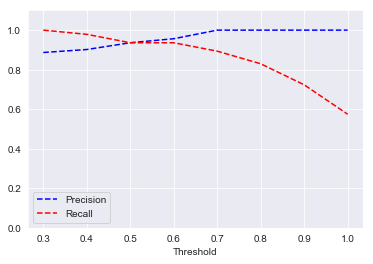

In [27]:
# Generate RandomForestClassifier scores to plot Precision-Recall curves
# sklearn classifiers have either a decision_function() method (that returns decision scores
#    or a predict_proba() method (that returns an array of rows for each instance, cols for
#    the probabilities for each class)
y_scores_rf = cross_val_predict(rf, X_train, y_train, cv=3, method='predict_proba')

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf[:, 1])

# Plot precision and recall values against thresholds
plt.plot(thresholds_rf, precisions_rf[:-1], "b--", label="Precision")
plt.plot(thresholds_rf, recalls_rf[:-1], "r--", label="Recall")
plt.legend()
plt.ylim([0, 1.1])
# plt.margins(0.2)
plt.xlabel("Threshold")
plt.show()

Area under the ROC curve: 0.9965


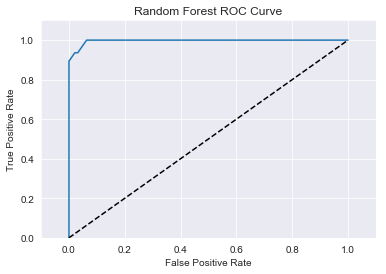

In [28]:
# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_roc_rf = roc_curve(y_train, y_scores_rf[:, 1])
auc_rf = roc_auc_score(y_train, y_scores_rf[:, 1])

print('Area under the ROC curve: {0:.4f}'.format(auc_rf))

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf);
plt.plot([0, 1], [0, 1], "k--");
plt.axis([-0.1, 1.1, 0, 1.1]);
plt.xlabel("False Positive Rate");
plt.ylabel("True Positive Rate");
plt.title("Random Forest ROC Curve");

In [56]:
# Setup simple data processing pipelines for each model
pipelines = {}

pipelines['logreg'] = Pipeline([('scaler', StandardScaler()),
                                ('logreg', LogisticRegression(random_state=42))])

pipelines['rf'] = Pipeline([('scaler', StandardScaler()),
                            ('rf', RandomForestClassifier(random_state=42))])

pipelines['gb'] = Pipeline([('scaler', StandardScaler()),
                            ('gb', GradientBoostingClassifier(random_state=42))])

# Setup hyperparameter grids for each model: step_name__parameter_name
logreg_hp = {'logreg__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
             'logreg__penalty': ['l1', 'l2']}

rf_hp = {'rf__n_estimators': [100, 200],
         'rf__max_features': ['auto', 'sqrt'],
         'rf__min_samples_leaf': [1, 3, 5, 10]}

gb_hp = {'gb__n_estimators': [100, 200],
         'gb__learning_rate': [0.05, 0.1, 0.2],
         'gb__max_depth': [1, 3, 5]}

hyperparameters = {
    'logreg': logreg_hp,
    'rf': rf_hp,
    'gb': gb_hp
}

# Run GridSearch cross validation to tune model hyperparameters
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')

/Users/heatherkusmierz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/heatherkusmierz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logreg has been fitted.


/Users/heatherkusmierz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


rf has been fitted.
gb has been fitted.


/Users/heatherkusmierz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
# Compare model performance
for name, model in fitted_models.items():
    print('Model: {}'.format(name))
    print('CV best score: {}'.format(model.best_score_))
    print('Best hyperparameters: {}'.format(model.best_params_))
    pred = model.predict(X_test)
    print('Test set score: {}'.format(model.score(X_test, y_test)))
    print('Classification Report')
    print(classification_report(y_test, pred))
    print()
    

Model: logreg
CV best score: 1.0
Best hyperparameters: {'logreg__C': 10, 'logreg__penalty': 'l1'}
Test set score: 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Model: rf
CV best score: 0.9929577464788732
Best hyperparameters: {'rf__max_features': 'auto', 'rf__min_samples_leaf': 1, 'rf__n_estimators': 100}
Test set score: 0.9444444444444444
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.92      0.92      0.92        12

   micro avg       0.94      0.94      0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36




### Regression

Regression problems use a dataset's features to try to make real-valued predictions, such as the price of a stock or value of a property.

The **$R^2$** score gives the amount of variance in the target variable that's predicted by features in the model.

In [96]:
# Analysis meant as demonstration of performance measures only - no EDA, data cleaning,
#    or model tuning has been performed

# Import model
from sklearn.ensemble import RandomForestRegressor

# Import scikit learn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [97]:
# Import toy Boston housing dataset from scikit learn
boston = sklearn.datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [105]:
# Create DataFrame to lightly explore data
# bdf = pd.DataFrame(boston['data'], columns=boston['feature_names'])
# bdf.head()

In [99]:
X_reg = boston['data']
y_reg = boston['target']

# Split into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg,
                                                                    test_size=0.2,
                                                                    random_state=42)

print(X_reg_train.shape, X_reg_test.shape, y_reg_train.shape, y_reg_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [100]:
# Fit model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_reg_train, y_reg_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
# Check different score types across 3-fold cross validation
reg_score_types = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

for score in reg_score_types:
    reg_vals = cross_val_score(rf_reg, X_reg_train, y_reg_train, cv=3, scoring=score)
    print('Method: {}'.format(score))
    print('Results: {}'.format(reg_vals))


Method: neg_mean_absolute_error
Results: [-2.35057778 -3.10021481 -2.18285075]
Method: neg_mean_squared_error
Results: [-15.21401021 -21.45936131 -12.51967336]
Method: r2
Results: [0.83318101 0.77951458 0.82577604]


In [106]:
pred_reg = rf_reg.predict(X_reg_test)
print('Mean Abs Error score on test: {0:.4f}'.format(mean_absolute_error(y_reg_test, pred_reg)))
print('Mean Squared Error score on test: {0:.4f}'.format(mean_squared_error(y_reg_test, pred_reg)))
print('R2 score on test: {0:.4f}'.format(r2_score(y_reg_test, pred_reg)))

Mean Abs Error score on test: 2.0494
Mean Squared Error score on test: 8.0913
R2 score on test: 0.8897


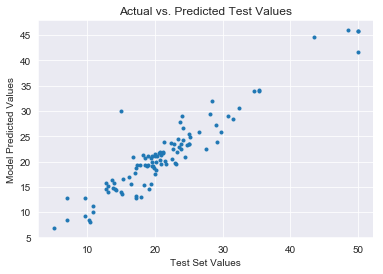

In [108]:
# Plot predicted test set values vs. the actual test set values
# Values should roughly fall along a 45 degree diagonal
plt.plot(y_reg_test, pred_reg, marker='.', linestyle='none')
plt.title('Actual vs. Predicted Test Values')
plt.xlabel('Test Set Values')
plt.ylabel('Model Predicted Values')
plt.show()